In [1]:
capitals = {}
capitals["Bahamas"] = "Nassau"
capitals["Croatia"] = "Zagreb"
capitals.get("Croatia")

capitals.get("Japan")  # None

In [2]:
capitals.update({
    "Lebanon": "Beirut",
    "Norway": "Oslo",
    "France": "Paris",
})
[capitals.get(k) for k in ("Lebanon", "Norway", "Bahamas")]

['Beirut', 'Oslo', 'Nassau']

https://learn.microsoft.com/en-us/windows/wsl/tutorials/wsl-database#install-redis
https://github.com/redis/redis?tab=readme-ov-file
https://try.redis.io/
https://redis.io/blog/get-redis-cli-without-installing-redis-server/

npm install -g redis-cli

Some commands in WSL2 Redis

> service --status-all


Some of the commands of Redis

SET GET MSET MGET EXISTS

A hash is a mapping of string:string, called field-value pairs, that sits under one top-level key:


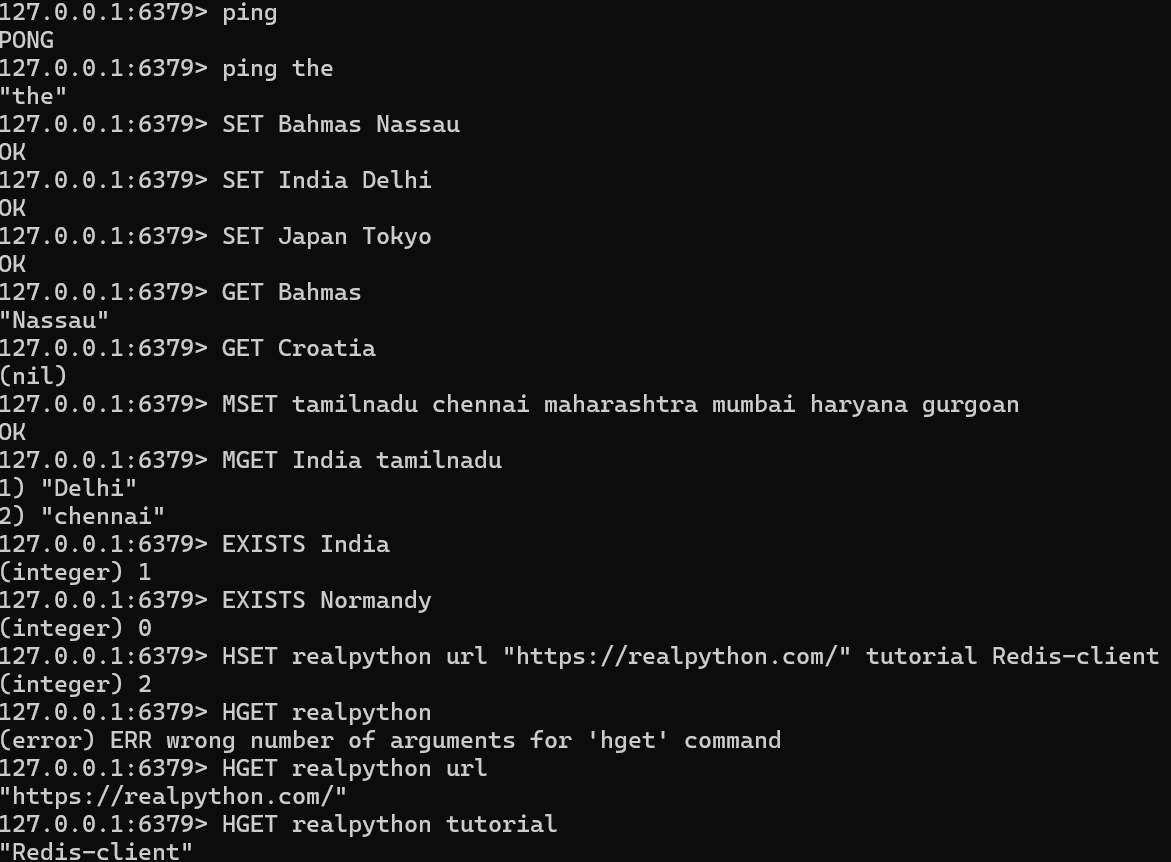

redis-py requires that you pass it keys that are bytes, str, int, or float. These will be converted to bytes before sending to redis

In [1]:
import redis

r = redis.Redis(host='127.0.0.1', port=6379, decode_responses=True)

In [2]:
r.mset({"india": "delhi", "haryana":"ggun", "Andraa":"Hyderabad"})

True

In [6]:
r.get('india')

'delhi'

In [7]:
r.getrange(key='india', start=0, end=2)

'del'

In [7]:
data = {
    "realpython": {
        "url": "https://realpython.com/",
        "github": "realpython",
        "fullname": "Real Python",
    }
}

Hashes: Commands to operate on hashes begin with an H, such as HSET, HGET, or HMSET.

Sets: Commands to operate on sets begin with an S, such as SCARD, which gets the number of elements at the set value corresponding to a given key.

Lists: Commands to operate on lists begin with an L or R. Examples include LPOP and RPUSH. The L or R refers to which side of the list is operated on. A few list commands are also prefaced with a B, which means blocking. A blocking operation doesn’t let other operations interrupt it while it’s executing. For instance, BLPOP executes a blocking left-pop on a list structure.

Note: One noteworthy feature of Redis’ list type is that it is a linked list rather than an array. This means that appending is O(1) while indexing at an arbitrary index number is O(N).

- Sets	SADD, SCARD, SDIFF, SDIFFSTORE, SINTER, SINTERSTORE, SISMEMBER, SMEMBERS, SMOVE, SPOP, SRANDMEMBER, SREM, SSCAN, SUNION, SUNIONSTORE

- Hashes	HDEL, HEXISTS, HGET, HGETALL, HINCRBY, HINCRBYFLOAT, HKEYS, HLEN, HMGET, HMSET, HSCAN, HSET, HSETNX, HSTRLEN, HVALS

- Lists	BLPOP, BRPOP, BRPOPLPUSH, LINDEX, LINSERT, LLEN, LPOP, LPUSH, LPUSHX, LRANGE, LREM, LSET, LTRIM, RPOP, RPOPLPUSH, RPUSH, RPUSHX

- Strings	APPEND, BITCOUNT, BITFIELD, BITOP, BITPOS, DECR, DECRBY, GET, GETBIT, GETRANGE, GETSET, INCR, INCRBY, INCRBYFLOAT, MGET, MSET, MSETNX, PSETEX, SET, SETBIT, SETEX, SETNX, SETRANGE, STRLEN

In [8]:
import datetime

today = datetime.date.today()
visitors = {"dan", "jon", "lex"}

r.sadd(today, *visitors)

DataError: Invalid input of type: 'date'. Convert to a bytes, string, int or float first.

In [10]:
btoday = today.isoformat()

r.sadd(btoday, *visitors)

3

In [11]:
import random
random.seed(444)

In [12]:
hats = {f"hat:{random.getrandbits(32)}" : i for i in (
    {
        "color": "black",
        "price": 49.99,
        "style": "fitted",
        "quantity": 1000,
        "npurchased": 0
    },
    {
        "color": "brown",
        "price": 79.99,
        "style": "hipster",
        "quantity": 1900,
        "npurchased":10
    },
    {
        "color": "blue",
        "price": 99.99,
        "style": "baseball",
        "quantity": 600,
        "npurchased": 5
    }
)}

In [14]:
hats

{'hat:1326692461': {'color': 'black',
  'price': 49.99,
  'style': 'fitted',
  'quantity': 1000,
  'npurchased': 0},
 'hat:1236154736': {'color': 'brown',
  'price': 79.99,
  'style': 'hipster',
  'quantity': 1900,
  'npurchased': 10},
 'hat:56854717': {'color': 'blue',
  'price': 99.99,
  'style': 'baseball',
  'quantity': 600,
  'npurchased': 5}}

In [13]:
r2 = redis.Redis(db=1)

In [18]:
with r2.pipeline() as pipe:
    for h_id, hat in hats.items():
        pipe.hmset(h_id, hat)
    pipe.execute()
# With a pipeline, all the commands are buffered on the client side and then sent at once, in one fell swoop, using pipe.hmset() in Line 3.

C:\Users\kamal\AppData\Local\Temp\ipykernel_11556\1855381915.py:3: DeprecationWarning: Pipeline.hmset() is deprecated. Use Pipeline.hset() instead.
  pipe.hmset(h_id, hat)


In [19]:
r2.bgsave()

True

In [20]:
from rich import print
print(r2.hgetall("hat:56854717"))

{b'color': b'blue', b'price': b'99.99', b'style': b'baseball', b'quantity': b'600', b'npurchased': b'5'}

In [21]:
r2.hincrby("hat:56854717", "quantity", -1)
r2.hget("hat:56854717", "quantity")
r2.hincrby("hat:56854717", "npurchased", 1)
# , namely INCR, INCRBY, INCRBYFLOAT, ZINCRBY, and HINCRBYFLOAT

6

The pair of increase and decrease operations need to be executed *atomically:* either both should be completed successfully, or neither should be (in the case that at least one fails

Txn Block: or Txn-pipelining. Everything or nothing 

127.0.0.1:6379> MULTI
127.0.0.1:6379> HINCRBY 56854717 quantity -1
127.0.0.1:6379> HINCRBY 56854717 npurchased 1
127.0.0.1:6379> EXEC

Redis has a clever answer for the dilemma in Step 3: it’s called optimistic locking, and is different than how typical locking works in an RDBMS such as PostgreSQL. 

Optimistic locking, in a nutshell, means that the calling function (client) does not acquire a lock, but rather monitors for changes in the data it is writing to during the time it would have held a lock. If there’s a conflict during that time, the calling function simply tries the whole process again.

In [25]:
import logging
import redis

logging.basicConfig()

class OutOfStockError(Exception):
    """Raised when PyHats.com is all out of today's hottest hat"""

def buyitem(r: redis.Redis, itemid: int) -> None:
    with r.pipeline() as pipe:
        error_count = 0
        while True:
            try:
                # Get available inventory, watching for changes
                # related to this itemid before the transaction
                pipe.watch(itemid)
                nleft: bytes = r.hget(itemid, "quantity")  # this is client side
                if nleft > b"0":  # from here it is all server side
                    pipe.multi()
                    pipe.hincrby(itemid, "quantity", -1)
                    # There’s a catch-22: this is also why you can’t put the call to .hget() into the transaction block.
                    pipe.hincrby(itemid, "npurchased", 1)
                    pipe.execute()
                    break
                else:
                    # Stop watching the itemid and raise to break out
                    pipe.unwatch()
                    raise OutOfStockError(
                        f"Sorry, {itemid} is out of stock!"
                    )
            except redis.WatchError:
                # Log total num. of errors by this user to buy this item,
                # then try the same process again of WATCH/HGET/MULTI/EXEC
                error_count += 1
                logging.warning(
                    "WatchError #%d: %s; retrying",
                    error_count, itemid
                )
    return None

One key here is in understanding the difference between client-side and server-side operations:

In [26]:
buyitem(r2, "hat:56854717")
buyitem(r2, "hat:56854717")
buyitem(r2, "hat:56854717")

In [28]:
r2.hmget("hat:56854717", "quantity", "npurchased")

[b'596', b'9']

In [30]:
for _ in range(596):
    buyitem(r2, 'hat:56854717')

OutOfStockError: Sorry, hat:56854717 is out of stock!

In [31]:
r2.hmget('hat:56854717', 'quantity', 'npurchased')

[b'0', b'605']

when you expire a key, that key and its corresponding value will be automatically deleted from the database after a certain number of seconds or at a certain timestamp.

In [32]:
from datetime import timedelta 

r2.setex(
    "runner",
    timedelta(minutes=1),
    value="now you see n now you dont"
)

True

In [33]:
r2.get("runner")

b'now you see n now you dont'

In [34]:
r2.expire("runner", timedelta(seconds=3))

False

In [35]:
r2.exists('runner')

0

In [36]:
# capturing the ip addresses

r6 = redis.Redis(db=6)

r6.lpush('ips', '75.22.15.55')
r6.lpush('ips', '25.8.1.55')
r6.lpush('ips', '175.98.1.5')
r6.lpush('ips', 'l5.34.15.55')
r6.lpush('ips', '76.52.15.55')

5

In [37]:
# New shell window or tab

import datetime
import ipaddress

import redis

# Where we put all the bad egg IP addresses
blacklist = set()
MAXVISITS = 15

ipwatcher = redis.Redis(db=5)

while True:
    _, addr = ipwatcher.blpop("ips")
    addr = ipaddress.ip_address(addr.decode("utf-8"))
    now = datetime.datetime.utcnow()
    addrts = f"{addr}:{now.minute}"
    n = ipwatcher.incrby(addrts, 1)
    if n >= MAXVISITS:
        print(f"Hat bot detected!:  {addr}")
        blacklist.add(addr)
    else:
        print(f"{now}:  saw {addr}")
    _ = ipwatcher.expire(addrts, 60)

In [ ]:
r.lastsave()  # Redis command: LASTSAVE

r.bgsave()

r.lastsave()

RDB snapshotting is fast because the parent process uses the fork() system call to pass off the time-intensive write to disk to a child process, so that the parent process can continue on its way. This is what the background in BGSAVE refers to.
```
restaurant_484272 = {
    "name": "Ravagh",
    "type": "Persian",
    "address": {
        "street": {
            "line1": "11 E 30th St",
            "line2": "APT 1",
        },
        "city": "New York",
        "state": "NY",
        "zip": 10016,
    }
}
```
tere are two different ways to mimic nested data in redis-py and Redis:

Serialize the values into a string with something like json.dumps()
Use a delimiter in the key strings to mimic nesting in the values

In [ ]:
import json  # or any other serialization protocol like yaml / 

restaurant_484272 = {
    "name": "Ravagh",
    "type": "Persian",
    "address": {
        "street": {
            "line1": "11 E 30th St",
            "line2": "APT 1",
        },
        "city": "New York",
        "state": "NY",
        "zip": 10016,
    }
}

r.set(484272, json.dumps(restaurant_484272))

It’s common for a client library such as redis-py to follow a protocol in how it is built. In this case, redis-py implements the REdis Serialization Protocol, or RESP.